In [1]:
import pandas, os, json
from whatthelang import WhatTheLang
wtl = WhatTheLang()

path ="/home/user/Documents/PROJETS/DATA/AirBnB"
os.chdir(path)
Airbnb_comment=pandas.read_csv("reviews.csv",encoding='utf-8',lineterminator='\n')
Airbnb_comment.comments.str.replace("\r\n", "")
Airbnb_comment.comments.str.replace("\n", "")
Airbnb_comment.comments.str.encode(encoding='utf-8', errors='strict')
Airbnb_comment['comments']=Airbnb_comment['comments'].astype(str)
Airbnb_comment.head()



#wtl.predict_lang('Es war eine tolle Erfahrung in einer privaten Wohnung mitten')


,listing_id,_id,date,reviewer_id,reviewer_name,comments
0,1027568,47892721,2015-09-21,4346070,Joydeep,Beautiful home in every sense; aesthetics & co...
1,1027568,49618144,2015-10-05,22681962,Marc,Iris and her family greeted us at the apartmen...
2,1027568,79705618,2016-06-13,37238215,Sam,We were greeted by Iris and her family on arri...
3,1268496,9575106,2014-01-02,48218,Collin,I stayed at Aurelie's over the new year and it...
4,1268496,13111695,2014-05-19,6667381,Kane,Auréle's place is great. It as our 2nd trip to...


In [2]:

#wtl.pred_prob('房东是个非常热情而有情调的人,我们相处比较愉快')
Airbnb_comment['langage']=Airbnb_comment['comments'].apply(wtl.pred_prob)
Airbnb_comment['langue']=Airbnb_comment['langage'].str[0].str[0].str[0]
Airbnb_comment['lg_proba']=Airbnb_comment['langage'].str[0].str[0].str[1]


In [3]:
Airbnb_comment.head(10)

,listing_id,_id,date,reviewer_id,reviewer_name,comments,langage,langue,lg_proba
0,1027568,47892721,2015-09-21,4346070,Joydeep,Beautiful home in every sense; aesthetics & co...,"[[(en, 0.9960975645499098)]]",en,0.996098
1,1027568,49618144,2015-10-05,22681962,Marc,Iris and her family greeted us at the apartmen...,"[[(en, 0.988311766721186)]]",en,0.988312
2,1027568,79705618,2016-06-13,37238215,Sam,We were greeted by Iris and her family on arri...,"[[(en, 0.9960975645499098)]]",en,0.996098
3,1268496,9575106,2014-01-02,48218,Collin,I stayed at Aurelie's over the new year and it...,"[[(en, 0.994148254456202)]]",en,0.994148
4,1268496,13111695,2014-05-19,6667381,Kane,Auréle's place is great. It as our 2nd trip to...,"[[(en, 0.9805488590692596)]]",en,0.980549
5,1268496,17799682,2014-08-17,17060334,Elodie,Nous n'avons pas croisé Aurélie qui était hors...,"[[(fr, 0.9922103581022618)]]",fr,0.992210
6,1268496,19091362,2014-09-06,19253510,Krystte,The reservation was canceled 3 days before arr...,"[[(en, 0.9902496331836446)]]",en,0.990250
7,1268496,22880015,2014-11-16,21245715,Romain,The reservation was canceled 5 days before arr...,"[[(en, 0.9902496331836446)]]",en,0.990250
8,1268496,24491528,2014-12-29,24540616,Michelle,Aurélie Allet s appartment is really near the ...,"[[(en, 0.9554214493002668)]]",en,0.955421
9,1268496,26456093,2015-02-13,6364566,Vladymyr,Staying in the apartment of Aurélie without an...,"[[(en, 0.9727478026845942)]]",en,0.972748


In [4]:
Airbnb_comment["langue"].value_counts()

en     548230
fr     205586
es      32826
it      12896
de      12386
pt       7320
ko       5648
zh       5443
ru       4053
nl       3530
da       1053
ja        981
sv        788
pl        720
ht        603
no        348
ca        324
fi        280
tr        275
cs        215
el        199
hu        181
ku         65
eo         60
ml         50
sh         42
la         36
oc         32
sk         22
uk         21
        ...  
fa          3
bs          2
uz          2
ta          2
azb         2
jbo         2
sq          2
cy          2
fy          1
sw          1
io          1
gd          1
min         1
pam         1
ast         1
cv          1
hy          1
lo          1
hsb         1
br          1
eml         1
jv          1
wa          1
et          1
bn          1
tg          1
lb          1
yi          1
hi          1
vo          1
Name: langue, Length: 88, dtype: int64

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stop_fr=stopwords.words('french')
stop_fr.append("très")
stop_fr.append("bien")
stop_fr.append("chez")
stop_fr.append("cet")
stop_fr.append("tout")
stop_fr.append("les")
stop_fr.append("toutes")
#for word in stop_fr:
#  word_str=word.encode("utf-8")
#  set_stop_fr.add(word_str)

#set_stop_fr.add("très")
#set_stop_fr.add("Il")
    
wc_fr = WordCloud(max_words=100,width=800,height=400, background_color='white',stopwords=stop_fr, relative_scaling=.9, colormap="plasma").generate(' '.join(Airbnb_comment[Airbnb_comment.langue=='fr'].comments.str.lower()))

In [41]:
stop_fr

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'je',
 'la',
 'le',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',
 'ayants',
 'eu'

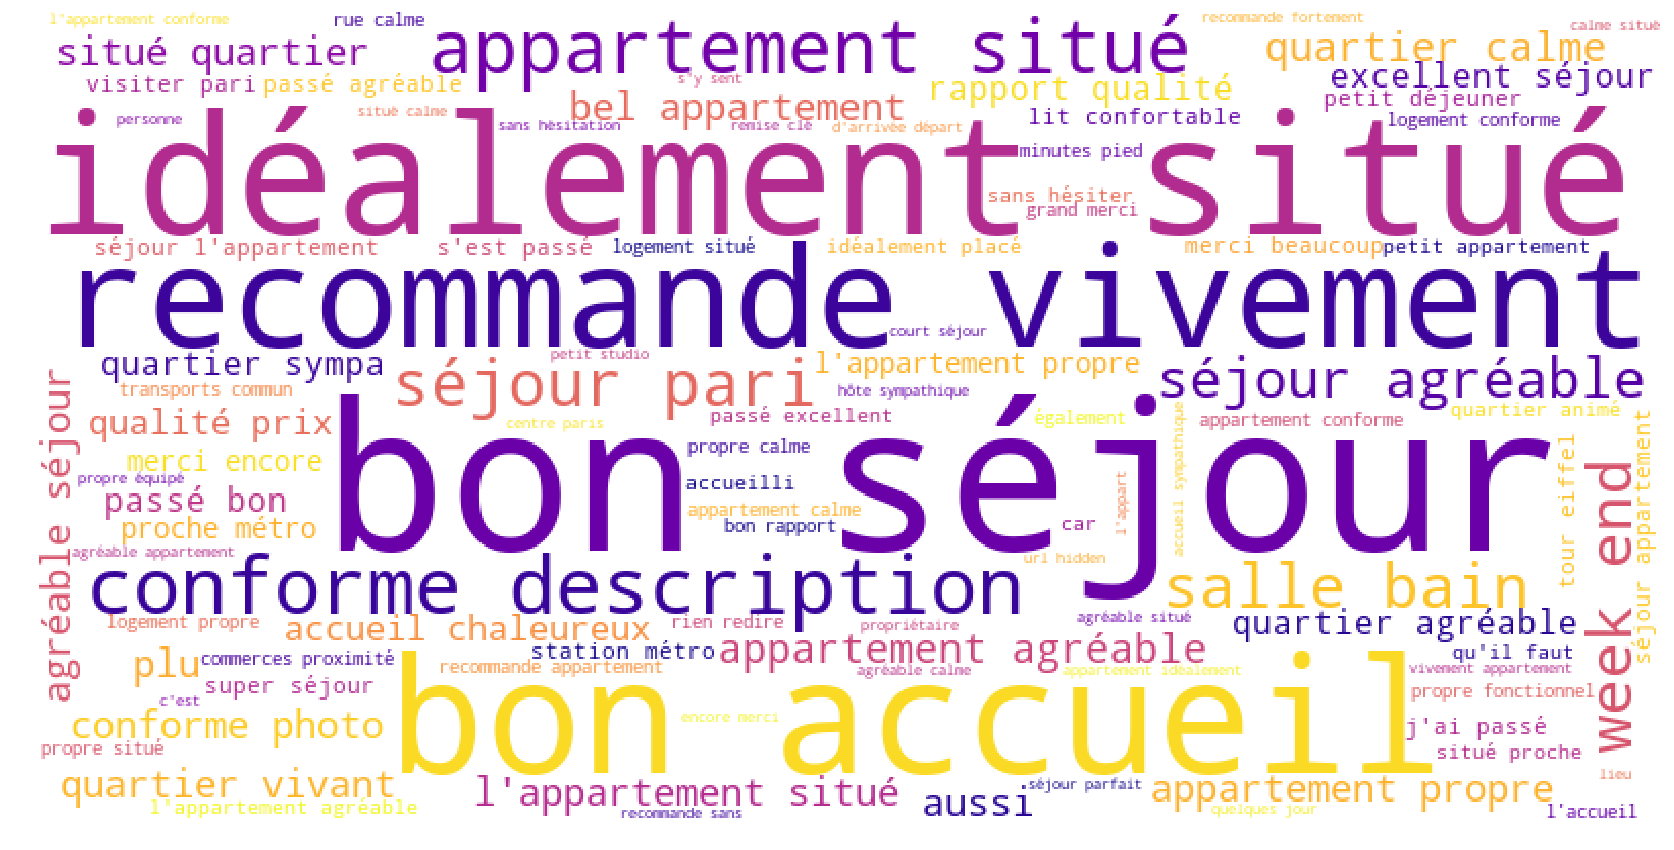

In [51]:
%matplotlib inline
plt.figure(figsize=(30,15))
plt.imshow(wc_fr)
plt.axis("off")
plt.show()

In [52]:
wc_fr.words_

{'bon séjour': 1.0,
 'idéalement situé': 0.9045281506712082,
 'bon accueil': 0.8692646764175516,
 'recommande vivement': 0.8305950711280304,
 'conforme description': 0.7736926467641755,
 'appartement situé': 0.728511320376678,
 'séjour pari': 0.6056902424363855,
 'week end': 0.5941695051091965,
 'salle bain': 0.5908635543979163,
 'séjour agréable': 0.5808455219394911,
 'appartement agréable': 0.5794429973953116,
 'quartier calme': 0.5707273091564816,
 'situé quartier': 0.5443798837908235,
 'bel appartement': 0.5343618513323983,
 "l'appartement situé": 0.5292526547786015,
 'appartement propre': 0.5245441795231417,
 'plu': 0.5216389501101983,
 'aussi': 0.5117210979763575,
 'conforme photo': 0.5009016229212583,
 'quartier vivant': 0.4874774594269685,
 'agréable séjour': 0.48286916449609296,
 'accueil chaleureux': 0.45872570627128834,
 'qualité prix': 0.4483069525145261,
 'quartier agréable': 0.44600280504908835,
 'passé bon': 0.4396914446002805,
 'excellent séjour': 0.4393909036265278,
 '

In [53]:
stop_en=stopwords.words('english')
    
wc_en = WordCloud(max_words=100,width=800,height=400, background_color='white',stopwords=stop_en).generate(' '.join(Airbnb_comment[Airbnb_comment.langue=='en'].comments.str.lower()))

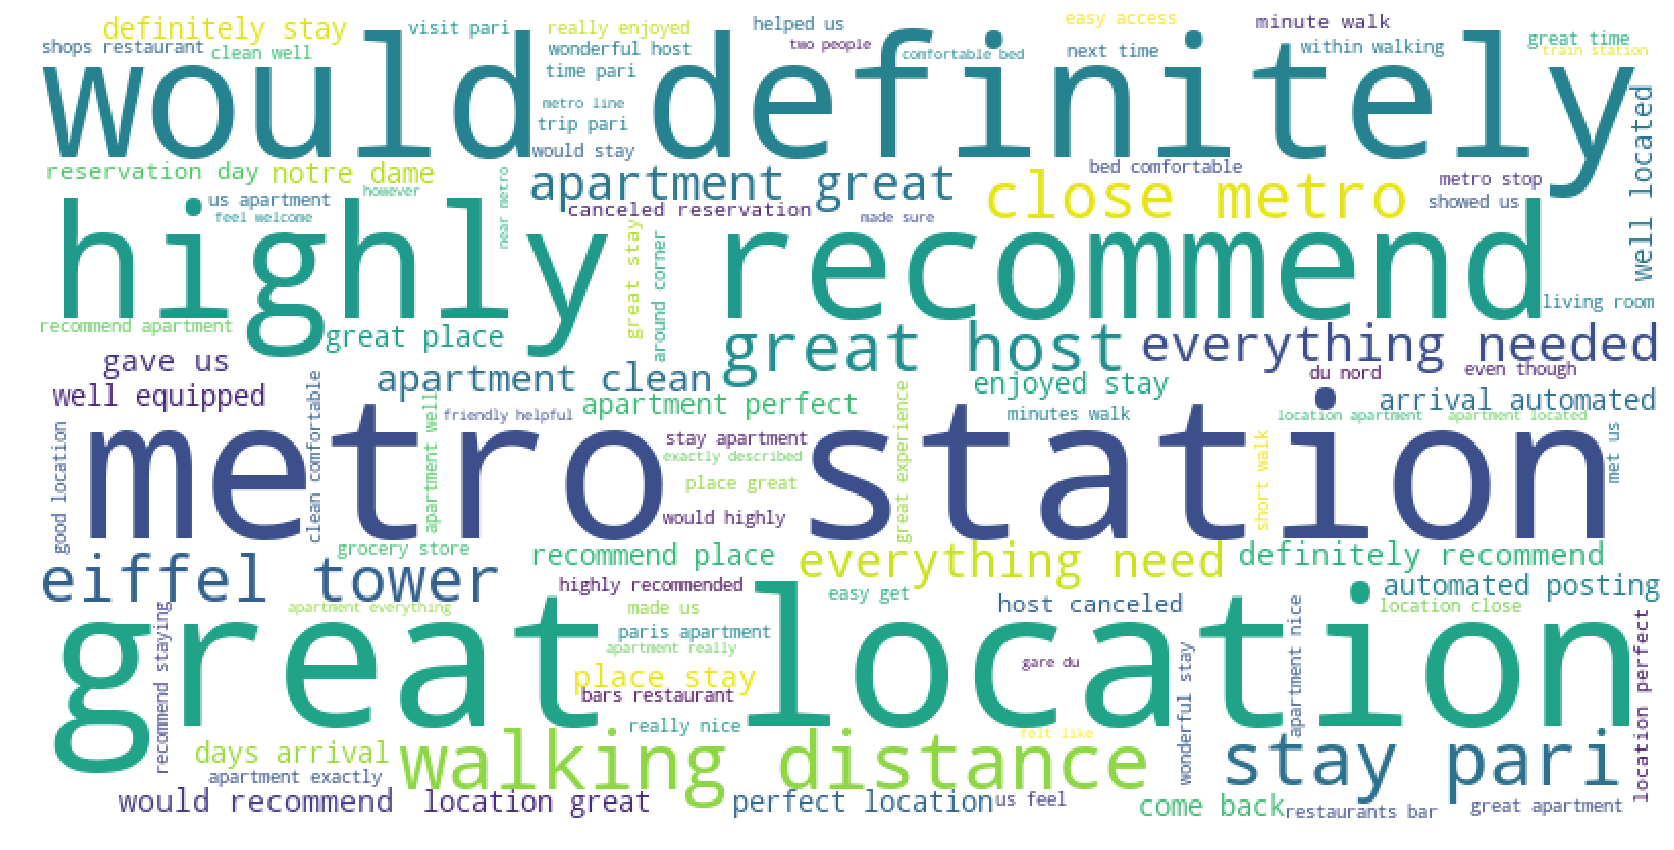

In [56]:
%matplotlib inline
plt.figure(figsize=(30,15))
plt.imshow(wc_en)
plt.axis("off")
plt.show()

In [55]:
wc_en.words_

{'metro station': 1.0,
 'great location': 0.9969914371673224,
 'would definitely': 0.7936083818981297,
 'highly recommend': 0.7483957838042541,
 'walking distance': 0.7240327365298437,
 'stay pari': 0.6497864551555826,
 'great host': 0.6324293618901349,
 'eiffel tower': 0.5637163114598893,
 'close metro': 0.5520817992468073,
 'everything needed': 0.530222381182807,
 'apartment great': 0.5076897182891166,
 'everything need': 0.5040920662304601,
 'apartment clean': 0.49752792914098165,
 'definitely recommend': 0.4712924196839957,
 'gave us': 0.47097683617007846,
 'place stay': 0.45879531253287326,
 'would recommend': 0.45168416401927164,
 'definitely stay': 0.41743283330878794,
 'automated posting': 0.4162967326586859,
 'arrival automated': 0.4162756937577581,
 'come back': 0.41444530937703816,
 'well equipped': 0.3941427699816962,
 'enjoyed stay': 0.3727672466390356,
 'days arrival': 0.3712524457722329,
 'recommend place': 0.3574930045654415,
 'apartment perfect': 0.3558730091939997,
 '